In [617]:
import pandas as pd
import numpy as np

In [618]:
df = pd.read_csv('problem_popularity_data.csv')

In [619]:
import re
def apply_regex(value):
    id = re.sub(r'^\d+\.\s*', '', value)
    id = id.lower()
    id = id.strip()
    id = id.replace(" ", "-")
    return id

df['name'] = df['name'].apply(apply_regex)

In [621]:
def convert_to_int(value):
    if 'M' in value:
        return int(float(value.replace('M', '')) * 10**6)
    elif 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    else:
        return int(value)

In [622]:
df['submissions_count'] = df['submissions'].apply(convert_to_int)
df['likes_count'] = df ['likes'].apply(convert_to_int)

In [623]:
df = df.drop(0)

In [624]:
df_features = ['name', 'submissions_count', 'likes_count']

In [625]:
df = df.loc[:, df_features]

In [626]:
df.set_index('name', inplace=True)

In [628]:
c_df = pd.read_csv('Data/final-problem-data.csv')

In [630]:
c_df['problem_name'] = c_df['id'].apply(lambda x: x.split('.')[1])

In [631]:
c_df['name'] = c_df['problem_name'].apply(apply_regex)

In [632]:
c_df.set_index('name', inplace=True)

In [634]:
def count_unique_companies(row):
    if pd.isna(row):
        return 0
    unique_strings = set(row.split(','))
    return len(unique_strings)

c_df['companies_count'] = c_df['companies'].apply(count_unique_companies)

In [635]:
c_df['comments_count'] = c_df['no-of-comments']

In [636]:
c_df_features = ['companies_count']

In [637]:
c_df = c_df.loc[:, c_df_features]

In [641]:
df = pd.merge(df, c_df, on='name', how='inner')

In [646]:
t_df = df.copy()

In [648]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [submissions_count, likes_count, companies_count]
Index: []


In [649]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [650]:
def z_score_normalize(column):
    mean = column.mean()
    std_dev = column.std()
    normalized_column = (column - mean) / std_dev
    return normalized_column

In [651]:
for col in df.columns:
    df[col] = z_score_normalize(df[col])

In [652]:
print(df)

                                                submissions_count  \
name                                                                
two-sum                                                 22.818563   
add-two-numbers                                          9.565741   
longest-substring-without-repeating-characters          15.056196   
median-of-two-sorted-arrays                              5.589894   
longest-palindromic-substring                            8.051132   
...                                                           ...   
harshad-number                                          -0.329479   
water-bottles-ii                                        -0.332982   
count-alternating-subarrays                             -0.327018   
minimize-manhattan-distances                            -0.353524   
find-trending-hashtags-ii                               -0.373663   

                                                likes_count  companies_count  
name                   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

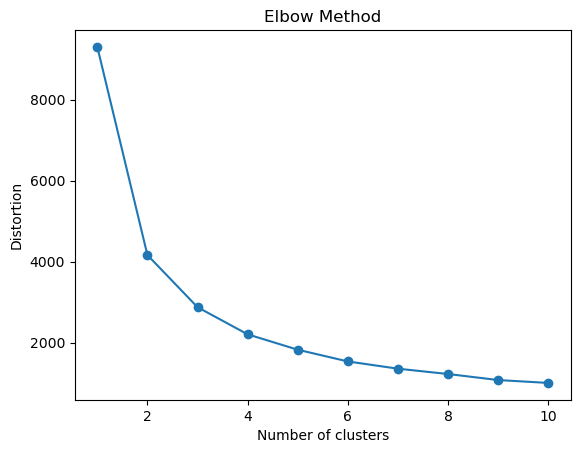

In [208]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1, 11)
distortions = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

plt.plot(cluster_range, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


In [653]:
n_clusters=4

kmeans = KMeans(n_clusters)

kmeans.fit(df)

labels = kmeans.labels_
df['cluster'] = labels

print("Cluster centers:")
print(kmeans.cluster_centers_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers:
[[-0.26671534 -0.34434736 -0.29507437]
 [ 7.66251568  6.44812005  7.23589552]
 [ 2.64434872  2.95048488  2.73049904]
 [ 0.46586685  0.8904409   0.6277256 ]]


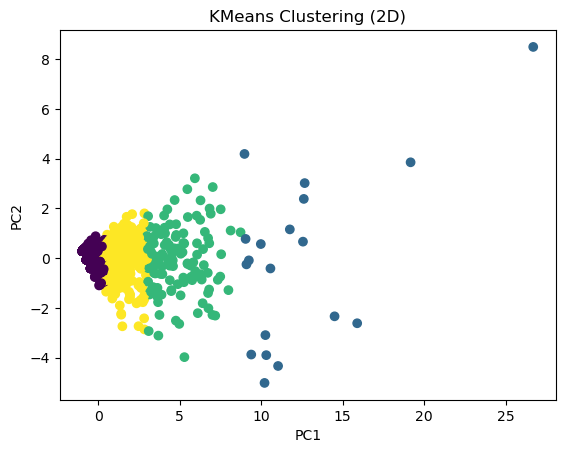

In [654]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df.drop('cluster', axis=1))

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering (2D)')
plt.show()

In [655]:
for i in range(n_clusters):
    indexes = df.index[df['cluster'] == i].tolist()
    #print("Indexes with 'cluster' value of ", i, ":", indexes)
    print(len(indexes))

2532
19
125
426


In [451]:
print(df)

                                                submissions_count  \
name                                                                
two-sum                                                 22.818563   
add-two-numbers                                          9.565741   
longest-substring-without-repeating-characters          15.056196   
median-of-two-sorted-arrays                              5.589894   
longest-palindromic-substring                            8.051132   
...                                                           ...   
harshad-number                                          -0.329479   
water-bottles-ii                                        -0.332982   
count-alternating-subarrays                             -0.327018   
minimize-manhattan-distances                            -0.353524   
find-trending-hashtags-ii                               -0.373663   

                                                likes_count  companies_count  \
name                  

In [452]:
df_features = ['cluster']
df = df.loc[:, df_features]

In [453]:
df = pd.merge(df, t_df, on='name', how='inner')

In [454]:
print(df.head())

                                                cluster  submissions_count  \
name                                                                         
two-sum                                               2           24500000   
add-two-numbers                                       2           10500000   
longest-substring-without-repeating-characters        2           16300000   
median-of-two-sorted-arrays                           2            6300000   
longest-palindromic-substring                         2            8900000   

                                                likes_count  companies_count  
name                                                                          
two-sum                                               55700               23  
add-two-numbers                                       30400               13  
longest-substring-without-repeating-characters        39100               21  
median-of-two-sorted-arrays                           2780

In [462]:
df.to_csv('popularity.csv', index=True)